# Startup Profit Prediction

### Life cycle of typical machine learning project
* Understand the problem statement
* Data Acquisition
* Exploratory Data Analysis
* Data Pre-processing
* Model Training
* Choose best model

### 1. Problem Statement
In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies are given along with the profit earned. The target is to prepare an ML model which can predict the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing Spend are given.<br>
<ol>
    <li>Construct Different Regression algorithms</li>
    <li>Divide the data into train set and test set</li>
    <li>Calculate different regression metrics</li>
    <li>Choose the best model</li>
</ol><br>
Language: Python or R 


## 2. Data Source
* https://drive.google.com/file/d/1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF/view
* Data consists of 50 rows and 4 columns

### 2.1 Import data and Required packages

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %inline matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Import the csv data as pandas dataframe

In [4]:
data = pd.read_csv("data/50_Startups.csv")

Show top 5 records

In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


Shape of the data

In [6]:
data.shape

(50, 4)

### 2.2 Data Information

* R&D Cost: Money spent on Research and Development
* Administration: Money spent on Administration
* Marketing: Money spent on marketing
* Profit: Profit startups made, it's the target variable

### 3. Data checks to Perform
* Check Missing Values
* Check Duplicate Values
* Check data type
* Check statistics of dataset

3.1 Check Missing Values

In [8]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

3.2 Check Duplicate Values

In [9]:
data.duplicated().sum()

0

3.3 Check data type

In [10]:
# Check null values and data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


3.4 Check Statistics of dataset

In [11]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Insights
* We don't have any null values.
* We don't have any duplicate values
* All features have same data type
* Some startups have 0 investment in R&D and marketing.
* The difference between mean and standard deviation in Administration is more that other two independent variables which shows that this column is more scattered.

## Exploratory Data Analysis

Visualize distribution of data

<Axes: xlabel='R&D Spend', ylabel='Density'>

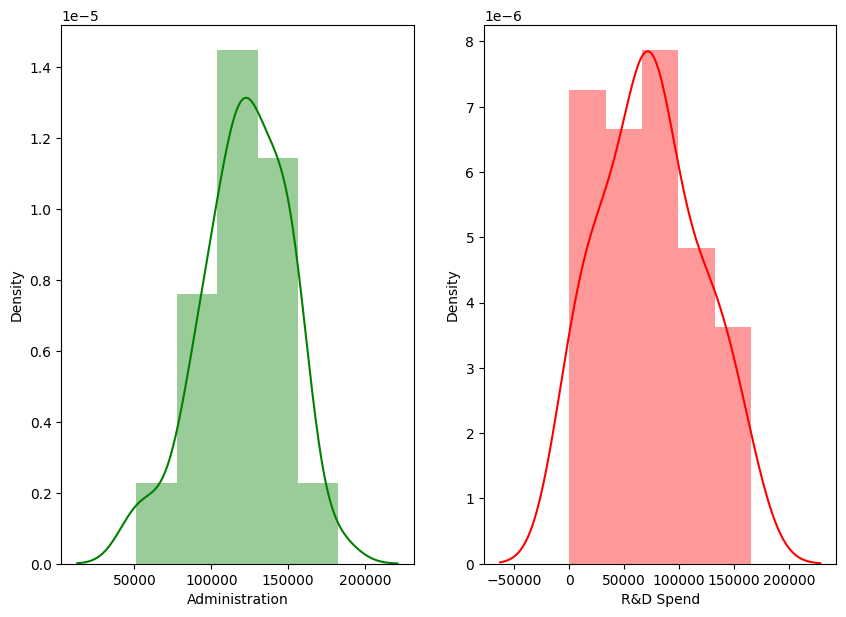

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (10, 7))
plt.subplot(121)
sns.distplot(data["Administration"], bins = 5, kde = True, color = 'g')
plt.subplot(122)
sns.distplot(data["R&D Spend"], bins = 5, kde = True, color = 'r')

<Axes: xlabel='Profit', ylabel='Density'>

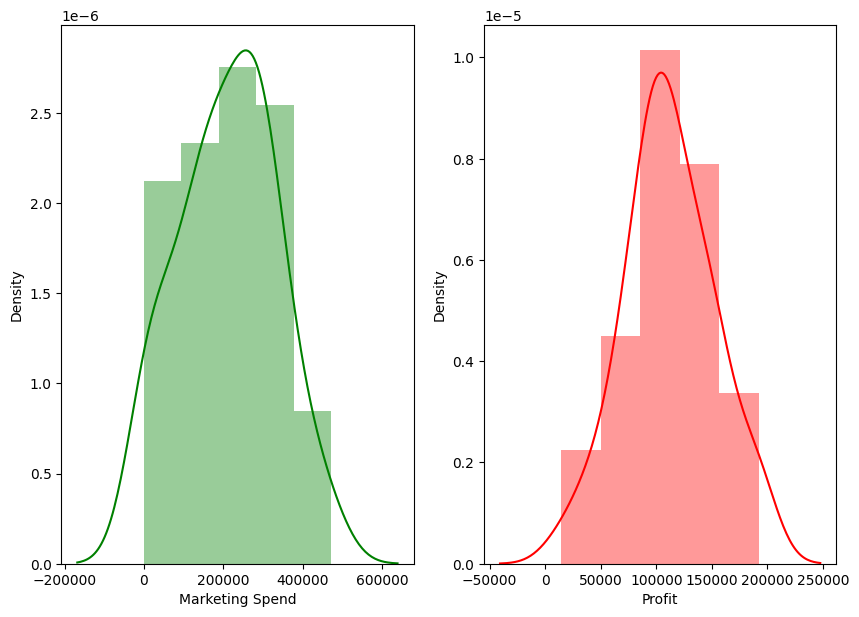

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (10, 7))
plt.subplot(121)
sns.distplot(data["Marketing Spend"], bins = 5, kde = True, color = 'g')
plt.subplot(122)
sns.distplot(data["Profit"], bins = 5, kde = True, color = 'r')

Insights
* We can see that data is distributed in gaussian manner.
* This means that our data has nearly mean, median and mode for all columns nearly equal

Visualize Box plot for the data to capture the outliers

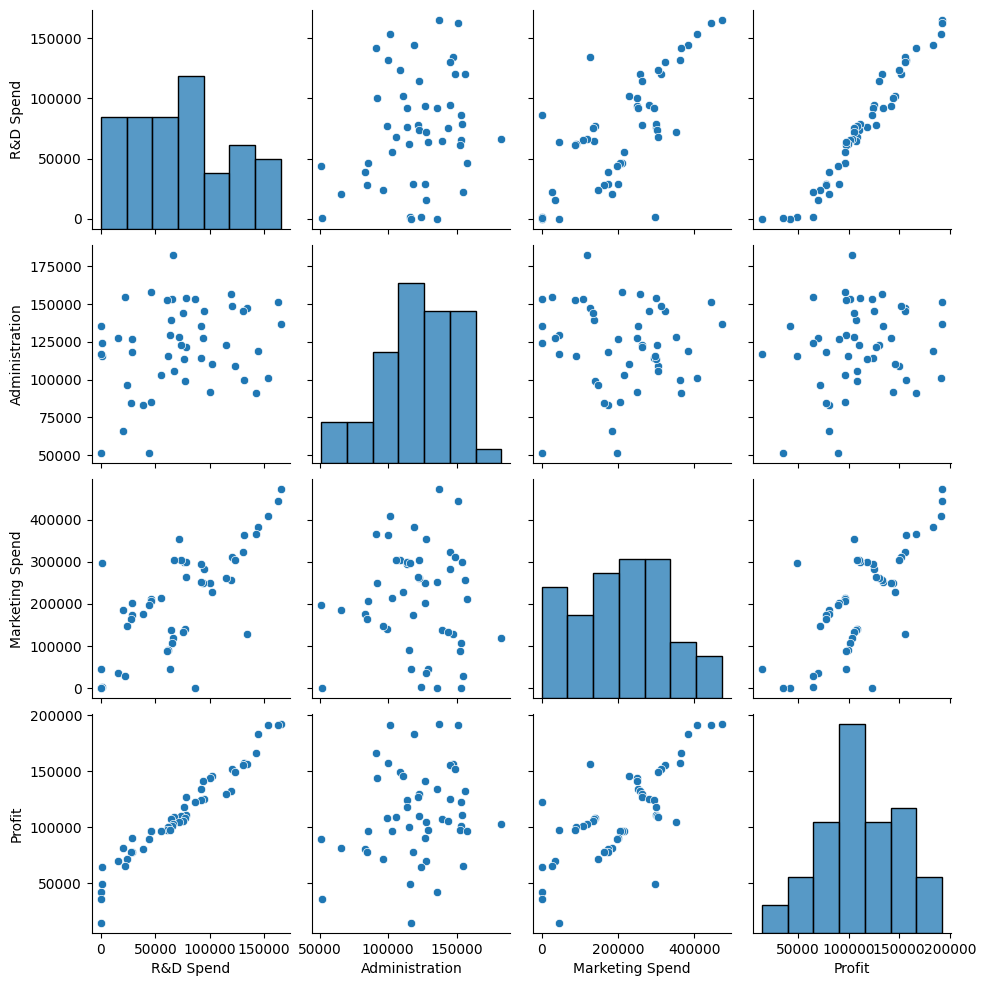

In [33]:
sns.pairplot(data)

Insights
* From the above plot we can see that, following relationship is almost linear.
* Profit -- R&D and Marketing Spend -- Profit